# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


(0.0, 10.5)

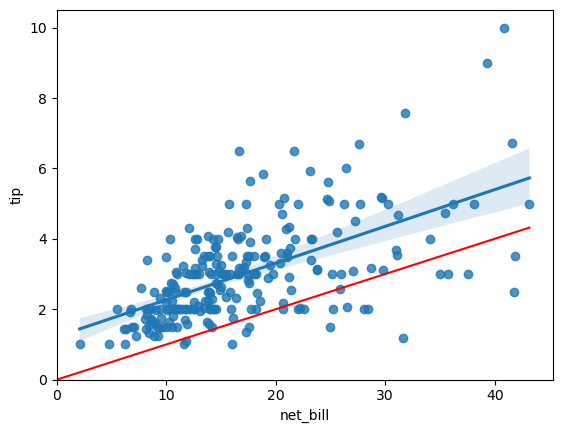

In [3]:
# Gráfico de dispersão
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

In [38]:
reg = smf.ols('tip ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           5.02e-23
Time:                        17:34:46   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [39]:
reg2 = smf.ols('tip_pct ~ net_bill', data = tips[tips['tip_pct']<.5]).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     56.10
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           1.31e-12
Time:                        17:34:50   Log-Likelihood:                 331.48
No. Observations:                 242   AIC:                            -659.0
Df Residuals:                     240   BIC:                            -652.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2538      0.009     27.252      0.000       0.235       0.272
net_bill      -0.0037      0.000     -7.490      0.000      -0.005      -0.003
==============================================================================
Omnibus:                       25.646   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.523
Skew:                           0.764   Prob(JB):                     1.43e-07
Kurtosis:                       3.889   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

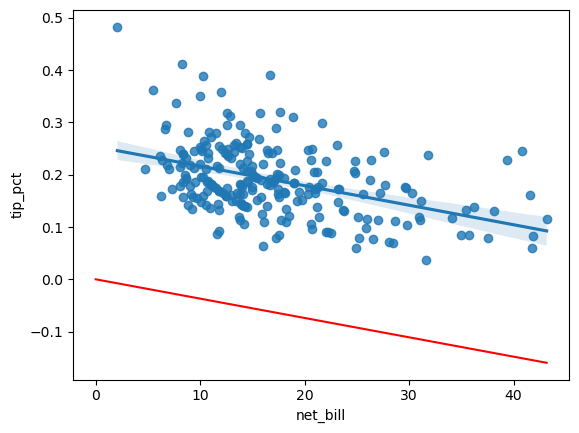

In [40]:
# Gráfico de dispersão
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = -0.0037*x

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 0,37%')

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

O aumento da conta reflete no aumento esperado da gorjeta, mas na diminuição de sua representação proporcional frente ao gasto na conta.

Isso faz sentido devido à variação aparente de apenas 1% da gorjeta entre os menores valores de conta e os maiores valores.

Exemplo:
- 2.5% de 4 dólares é 0.1 dólar
- 1.5% de 42 dólares é 0.63 dólar

A diferença resultante do ajuste se dá em virtude da inclinação negativa da constante alfa na equação de estimativa do modelo.

A comparação dos R2 traz uma visão da variabilidade dos dados ao longo do eixo y, logo o segundo modelo demonstra que seus dados variam menos ao longo da curva de regressão.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [55]:
dados = tips[tips['tip_pct']<.5].copy()

reg2.predict(dados)
reg2.fittedvalues

0      0.194125
1      0.221392
2      0.188410
3      0.177727
4      0.175448
         ...   
239    0.167492
240    0.159760
241    0.176606
242    0.193789
243    0.194872
Length: 242, dtype: float64

In [61]:
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     56.10
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           1.31e-12
Time:                        17:46:37   Log-Likelihood:                 331.48
No. Observations:                 242   AIC:                            -659.0
Df Residuals:                     240   BIC:                            -652.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2538      0.009     27.252      0.000       0.235       0.272
net_bill      -0.0037      0.000     -7.490      0.000      -0.005      -0.003
==============================================================================
Omnibus:                       25.646   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.523
Skew:                           0.764   Prob(JB):                     1.43e-07
Kurtosis:                       3.889   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
dados['tip'] = dados['tip_pct']*dados['net_bill']

reg3 = smf.ols('tip ~ net_bill', data = dados).fit()
reg3.predict(dados)
reg3.fittedvalues

0      2.889789
1      2.127863
2      3.049481
3      3.347989
4      3.411657
         ...   
239    3.633972
240    3.850025
241    3.379301
242    2.899183
243    2.868915
Length: 242, dtype: float64

In [60]:
reg3.summary() #O R2 do modelo é 0.364

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     137.1
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           2.41e-25
Time:                        17:46:02   Log-Likelihood:                -366.31
No. Observations:                 242   AIC:                             736.6
Df Residuals:                     240   BIC:                             743.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2219      0.166      7.339      0.000       0.894       1.550
net_bill       0.1044      0.009     11.708      0.000       0.087       0.122
==============================================================================
Omnibus:                       27.459   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.674
Skew:                           0.610   Prob(JB):                     9.92e-12
Kurtosis:                       4.881   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

No tocante aos R2 de ambos modelos, o modelo de 'tip_pct' é mais ajustado se comparado ao modelo de 'tip', pois ó o R2 é inferior.